## Telecom Churn Case Study

### Problem statement

In this project,to minimize customer churn, telecom company needs to predict which customers are at high risk of churn.So, we have to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Therefore, telecom company could take proactive initiatives to retaining high profitable customers.

Churn is predicted using two approaches. 
- Usage based churn
- Revenue based churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage. Hence, this case study focuses on high value customers only.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively

This is a classification problem, where we need to predict whether the customers is about to churn or not. We have carried out Baseline Logistic Regression, then Logistic Regression with PCA, PCA + Random Forest, PCA + XGBoost.

### Steps
 - Reading, understanding, imputing, Standadizing, and visualising the data
 
 - Preparing the data for modelling
 
 - Building the model
 
 - Evaluate the model
 
 - SMOTE Technique to overcome class-imbalance
 
 - Recommendations

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Setting max display columns and rows.
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# Reading Dataset.

data=pd.read_csv('telecom_churn_data.csv')
data.head(20)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
data.shape

(99999, 226)

In [5]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Handling missing values
#### Handling missing values in columns

In [6]:
# Cheking percentage of missing values in columns
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [7]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(data_missing_columns.index[data_missing_columns['null'] > 30])


In [8]:
# Delete the columns having more than 30% missing values
data = data.drop(col_list_missing_30, axis=1)


In [9]:
data.shape


(99999, 186)

##### Deleting the date columns as the date columns are not required in our analysis


In [10]:
# List the date columns
date_cols = [k for k in data.columns.to_list() if 'date' in k]
print(date_cols) 


['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [11]:
# Dropping date columns
data = data.drop(date_cols, axis=1)


Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.


In [12]:
# Drop circle_id column
data = data.drop('circle_id', axis=1)


In [13]:
data.shape


(99999, 177)

### Filtering High Value Customer
Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount


In [14]:
data['avg_rech_amt_6_7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2


Finding the 70th percentile of the avg_rech_amt_6_7


In [15]:
X = data['avg_rech_amt_6_7'].quantile(0.7)
X


368.5

Filter the customers, who have recharged more than or equal to X.


In [16]:
data = data[data['avg_rech_amt_6_7'] >= X]


In [17]:
data.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,2

We can see that we have around *~30K* rows after filtering

In [18]:
data.shape


(30011, 178)

#### Handling missing values in rows


In [19]:
# Count the rows having more than 50% missing values
data_missing_rows_50 = data[(data.isnull().sum(axis=1)) > (len(data.columns)//2)]
data_missing_rows_50.shape


(114, 178)

In [20]:
# Deleting the rows having more than 50% missing values
data = data.drop(data_missing_rows_50.index)
data.shape


(29897, 178)

## Month 6 - June

In [21]:
# cheking percent of missing values in columns
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns


,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


In [22]:
# Listing the columns of MOU Jun(6)
print(((data_missing_columns[data_missing_columns['null'] == 0.44]).index).to_list())


[]


In [23]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
data_null_mou_6 = data[(data['loc_og_t2m_mou_6'].isnull()) & (data['loc_ic_t2f_mou_6'].isnull()) & (data['roam_og_mou_6'].isnull()) & (data['std_ic_t2m_mou_6'].isnull()) &
  (data['loc_og_t2t_mou_6'].isnull()) & (data['std_ic_t2t_mou_6'].isnull()) & (data['loc_og_t2f_mou_6'].isnull()) & (data['loc_ic_mou_6'].isnull()) &
  (data['loc_og_t2c_mou_6'].isnull()) & (data['loc_og_mou_6'].isnull()) & (data['std_og_t2t_mou_6'].isnull()) & (data['roam_ic_mou_6'].isnull()) &
  (data['loc_ic_t2m_mou_6'].isnull()) & (data['std_og_t2m_mou_6'].isnull()) & (data['loc_ic_t2t_mou_6'].isnull()) & (data['std_og_t2f_mou_6'].isnull()) & 
  (data['std_og_t2c_mou_6'].isnull()) & (data['og_others_6'].isnull()) & (data['std_og_mou_6'].isnull()) & (data['spl_og_mou_6'].isnull()) & 
  (data['std_ic_t2f_mou_6'].isnull()) & (data['isd_og_mou_6'].isnull()) & (data['std_ic_mou_6'].isnull()) & (data['offnet_mou_6'].isnull()) & 
  (data['isd_ic_mou_6'].isnull()) & (data['ic_others_6'].isnull()) & (data['std_ic_t2o_mou_6'].isnull()) & (data['onnet_mou_6'].isnull()) & 
  (data['spl_ic_mou_6'].isnull())]

data_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,NaN,0.0,

In [24]:
# Deleting the records for which MOU for Jun(6) are null
data = data.drop(data_null_mou_6.index)

In [25]:
# Again cheking percent of missing values in columns
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns


,null
ic_others_9,5.15
spl_og_mou_9,5.15
loc_ic_t2f_mou_9,5.15
std_og_t2t_mou_9,5.15
loc_ic_t2m_mou_9,5.15
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

## Month 7 - July

In [26]:
# Listing the columns of MOU Jul(7)
print(((data_missing_columns[data_missing_columns['null'] == 0.12]).index).to_list())


[]


In [27]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
data_null_mou_7 = data[(data['loc_og_t2m_mou_7'].isnull()) & (data['loc_ic_t2f_mou_7'].isnull()) & (data['roam_og_mou_7'].isnull()) & (data['std_ic_t2m_mou_7'].isnull()) &
  (data['loc_og_t2t_mou_7'].isnull()) & (data['std_ic_t2t_mou_7'].isnull()) & (data['loc_og_t2f_mou_7'].isnull()) & (data['loc_ic_mou_7'].isnull()) &
  (data['loc_og_t2c_mou_7'].isnull()) & (data['loc_og_mou_7'].isnull()) & (data['std_og_t2t_mou_7'].isnull()) & (data['roam_ic_mou_7'].isnull()) &
  (data['loc_ic_t2m_mou_7'].isnull()) & (data['std_og_t2m_mou_7'].isnull()) & (data['loc_ic_t2t_mou_7'].isnull()) & (data['std_og_t2f_mou_7'].isnull()) & 
  (data['std_og_t2c_mou_7'].isnull()) & (data['og_others_7'].isnull()) & (data['std_og_mou_7'].isnull()) & (data['spl_og_mou_7'].isnull()) & 
  (data['std_ic_t2f_mou_7'].isnull()) & (data['isd_og_mou_7'].isnull()) & (data['std_ic_mou_7'].isnull()) & (data['offnet_mou_7'].isnull()) & 
  (data['isd_ic_mou_7'].isnull()) & (data['ic_others_7'].isnull()) & (data['std_ic_t2o_mou_7'].isnull()) & (data['onnet_mou_7'].isnull()) & 
  (data['spl_ic_mou_7'].isnull())]

data_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
490,7000369789,0.0,0.0,0.0,679.329,0.0,0.0,0.0,189.51,NaN,NaN,NaN,920.18,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,18.44,NaN,NaN,NaN,131.23,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1.13,NaN,NaN,NaN,149.68,NaN,NaN,NaN,171.06,NaN,NaN,NaN,781.49,NaN,NaN,NaN,4.26,NaN,NaN,NaN,0.0,NaN,NaN,NaN,956.83,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3.18,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1109.69,0.0,0.0,0.0,5.58,NaN,NaN,NaN,84.26,NaN,NaN,NaN,2.91,NaN,NaN,NaN,92.76,NaN,NaN,NaN,0.00,NaN,NaN,NaN,20.86,NaN,NaN,NaN,5.91,NaN,NaN,NaN,0.0,NaN,NaN,NaN,26.78,NaN,NaN,NaN,120.03,0.0,0.0,0.0,0.36,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.11,NaN,NaN,NaN,18,0,0,0,786,0,0,0,110,0,0,0,50,0,0,0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,341,0.0,0.0,0.00,0.0,393.0
539,7000670087,0.0,0.0,0.0,704.033,0.0,0.0,0.0,199.04,NaN,NaN,NaN,132.31,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,187.93,NaN,NaN,NaN,85.06,NaN,NaN,NaN,1.73,NaN,NaN,NaN,0.00,NaN,NaN,NaN,274.73,NaN,NaN,NaN,11.11,NaN,NaN,NaN,42.49,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,53.61,NaN,NaN,NaN,0.00,NaN,NaN,NaN,7.44,NaN,NaN,NaN,0.93,NaN,NaN,NaN,336.73,0.0,0.0,0.0,18.24,NaN,NaN,NaN,45.86,NaN,NaN,NaN,1.73,NaN,NaN,NaN,65.84,NaN,NaN,NaN,13.13,NaN,NaN,NaN,75.89,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,89.03,NaN,NaN,NaN,154.88,0.0,0.0,0.0,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,29,3,1,2,833,0,0,0,150,0,0,0,50,0,0,0,73.92,0.0,0.0,0.0,2503.67,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,

In [28]:
# Deleting the records for which MOU for Jul(7) are null
data = data.drop(data_null_mou_7.index)

In [29]:
# Again cheking percent of missing values in columns
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns

,null
std_ic_mou_9,4.79
loc_ic_t2m_mou_9,4.79
loc_og_t2t_mou_9,4.79
loc_ic_mou_9,4.79
loc_og_t2m_mou_9,4.79
...,...
isd_og_mou_7,0.00
isd_og_mou_6,0.00
std_og_mou_7,0.00
std_og_mou_6,0.00


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

## Month 8 - Aug

In [30]:
# Listing the columns of MOU Aug(8)
print(((data_missing_columns[data_missing_columns['null'] == 0.55]).index).to_list())


[]


In [31]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
data_null_mou_8 = data[(data['loc_og_t2m_mou_8'].isnull()) & (data['loc_ic_t2f_mou_8'].isnull()) & (data['roam_og_mou_8'].isnull()) & (data['std_ic_t2m_mou_8'].isnull()) &
  (data['loc_og_t2t_mou_8'].isnull()) & (data['std_ic_t2t_mou_8'].isnull()) & (data['loc_og_t2f_mou_8'].isnull()) & (data['loc_ic_mou_8'].isnull()) &
  (data['loc_og_t2c_mou_8'].isnull()) & (data['loc_og_mou_8'].isnull()) & (data['std_og_t2t_mou_8'].isnull()) & (data['roam_ic_mou_8'].isnull()) &
  (data['loc_ic_t2m_mou_8'].isnull()) & (data['std_og_t2m_mou_8'].isnull()) & (data['loc_ic_t2t_mou_8'].isnull()) & (data['std_og_t2f_mou_8'].isnull()) & 
  (data['std_og_t2c_mou_8'].isnull()) & (data['og_others_8'].isnull()) & (data['std_og_mou_8'].isnull()) & (data['spl_og_mou_8'].isnull()) & 
  (data['std_ic_t2f_mou_8'].isnull()) & (data['isd_og_mou_8'].isnull()) & (data['std_ic_mou_8'].isnull()) & (data['offnet_mou_8'].isnull()) & 
  (data['isd_ic_mou_8'].isnull()) & (data['ic_others_8'].isnull()) & (data['std_ic_t2o_mou_8'].isnull()) & (data['onnet_mou_8'].isnull()) & 
  (data['spl_ic_mou_8'].isnull())]

data_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.00,0.000,55.19,3.26,NaN,NaN,45.51,12.34,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,55.19,3.26,NaN,NaN,43.83,12.34,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.0,NaN,NaN,99.03,15.61,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,1.30,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1.30,0.00,NaN,NaN,0.0,0.0,NaN,NaN,0.38,2.71,NaN,NaN,1.29,0.0,NaN,NaN,102.01,18.33,0.0,0.00,50.01,16.66,NaN,NaN,160.68,58.53,NaN,NaN,5.06,0.40,NaN,NaN,215.76,75.59,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.0,NaN,NaN,1.13,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1.13,0.00,NaN,NaN,217.04,75.59,0.0,0.00,0.0,0.0,NaN,NaN,0.00,0.0,NaN,NaN,0.15,0.0,NaN,NaN,12,8,5,2,704,178,0,0,154,50,0,0,154,30,0,0,284.50,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.00,0.000,1325.91,28.61,NaN,NaN,13.91,1.89,NaN,NaN,0.00,8.94,NaN,NaN,0.00,8.53,NaN,NaN,18.89,6.83,NaN,NaN,8.58,1.56,NaN,NaN,0.00,0.00,NaN,NaN,2.09,0.0,NaN,NaN,27.48,8.39,NaN,NaN,1307.01,13.58,NaN,NaN,1.95,0.00,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,NaN,NaN,1308.96,13.58,NaN,NaN,0.0,0.0,NaN,NaN,3.38,0.00,NaN,NaN,1.20,0.0,NaN,NaN,1341.03,21.98,0.0,0.00,30.19,7.06,NaN,NaN,27.98,1.35,NaN,NaN,10.13,0.00,NaN,NaN,68.31,8.41,NaN,NaN,25.56,0.00,NaN,NaN,0.00,0.0,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0,NaN,NaN,25.56,0.00,NaN,NaN,93.88,8.41,0.0,0.00,0.0,0.0,NaN,NaN,0.00,0.0,NaN,NaN,0.00,0.0,NaN,NaN,31,6,4,2,796,40,0,0,90,30,0,

In [32]:
# Deleting the records for which MOU for Aug(8) are null
data = data.drop(data_null_mou_8.index)

In [33]:
# Again cheking percent of missing values in columns
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns

,null
std_ic_t2t_mou_9,3.01
loc_og_t2c_mou_9,3.01
std_ic_mou_9,3.01
loc_og_t2t_mou_9,3.01
og_others_9,3.01
...,...
isd_og_mou_8,0.00
spl_og_mou_6,0.00
spl_og_mou_7,0.00
spl_og_mou_8,0.00


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

## Month 9 - September

In [34]:
# Listing the columns of MOU Sep(9)
print(((data_missing_columns[data_missing_columns['null'] == 5.32]).index).to_list())


[]


In [35]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
data_null_mou_9 = data[(data['loc_og_t2m_mou_9'].isnull()) & (data['loc_ic_t2f_mou_9'].isnull()) & (data['roam_og_mou_9'].isnull()) & (data['std_ic_t2m_mou_9'].isnull()) &
  (data['loc_og_t2t_mou_9'].isnull()) & (data['std_ic_t2t_mou_9'].isnull()) & (data['loc_og_t2f_mou_9'].isnull()) & (data['loc_ic_mou_9'].isnull()) &
  (data['loc_og_t2c_mou_9'].isnull()) & (data['loc_og_mou_9'].isnull()) & (data['std_og_t2t_mou_9'].isnull()) & (data['roam_ic_mou_9'].isnull()) &
  (data['loc_ic_t2m_mou_9'].isnull()) & (data['std_og_t2m_mou_9'].isnull()) & (data['loc_ic_t2t_mou_9'].isnull()) & (data['std_og_t2f_mou_9'].isnull()) & 
  (data['std_og_t2c_mou_9'].isnull()) & (data['og_others_9'].isnull()) & (data['std_og_mou_9'].isnull()) & (data['spl_og_mou_9'].isnull()) & 
  (data['std_ic_t2f_mou_9'].isnull()) & (data['isd_og_mou_9'].isnull()) & (data['std_ic_mou_9'].isnull()) & (data['offnet_mou_9'].isnull()) & 
  (data['isd_ic_mou_9'].isnull()) & (data['ic_others_9'].isnull()) & (data['std_ic_t2o_mou_9'].isnull()) & (data['onnet_mou_9'].isnull()) & 
  (data['spl_ic_mou_9'].isnull())]

data_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.00,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.000,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06

In [36]:
data_null_mou_9.shape

(870, 178)

In [37]:
# Deleting the records for which MOU for Sep(9) are null
data = data.drop(data_null_mou_9.index)

In [38]:
# Again Cheking percent of missing values in columns
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


We can see there are no more missing values in any columns.

In [39]:
data.shape

(27991, 178)

In [40]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(data.index)/30011)),2)

0.07

We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

### Tag churners
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.



In [41]:
data['churn'] = np.where((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0), 1, 0)
data

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.00,0.00,0.49,0.00,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,1

In [42]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,

#### Deleting all the attributes corresponding to the churn phase

In [43]:
# List the columns for churn month(9)
col_9 = [col for col in data.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [44]:
# Deleting the churn month columns
data = data.drop(col_9, axis=1)

In [45]:
# Dropping sep_vbc_3g column
data = data.drop('sep_vbc_3g', axis=1)

#### Checking churn percentage

In [46]:
round(100*(data['churn'].mean()),2)

3.39

There is very little percentage of churn rate. We will take care of the class imbalance later.

## Outliers treatment

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [47]:

data['mobile_number'] = data['mobile_number'].astype(object)
data['churn'] = data['churn'].astype(object)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [49]:
# List only the numeric columns
numeric_cols = data.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [50]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = data[col].quantile(0.10)
    q3 = data[col].quantile(0.980)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data1 = data.loc[(data[col] > range_low) & (data[col] < range_high)]


In [51]:
data1.shape

(27962, 136)

### Derive new features

In [52]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data1.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column decrease_mou_action
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [53]:
# Total mou at good phase incoming and outgoing
data1['total_mou_good'] = (data1['total_og_mou_6'] + data1['total_ic_mou_6'])

In [54]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data1['avg_mou_action'] = (data1['total_og_mou_7'] + data1['total_og_mou_8'] + data1['total_ic_mou_7'] + data1['total_ic_mou_8'])/2


In [55]:
# Difference avg_mou_good and avg_mou_action
data1['diff_mou'] = data1['avg_mou_action'] - data1['total_mou_good']

In [56]:
# Checking whether the mou has decreased in action phase
data1['decrease_mou_action'] = np.where((data1['diff_mou'] < 0), 1, 0)

In [57]:
data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0

#### Deriving new column decrease_rech_num_action
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [58]:

# Avg rech number at action phase
data1['avg_rech_num_action'] = (data1['total_rech_num_7'] + data1['total_rech_num_8'])/2


In [59]:
# Difference total_rech_num_6 and avg_rech_action
data1['diff_rech_num'] = data1['avg_rech_num_action'] - data1['total_rech_num_6']


In [60]:
# Checking if rech_num has decreased in action phase
data1['decrease_rech_num_action'] = np.where((data1['diff_rech_num'] < 0), 1, 0)

In [61]:
data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,7

### Deriving new column decrease_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [62]:
# Avg rech_amt in action phase
data1['avg_rech_amt_action'] = (data1['total_rech_amt_7'] + data1['total_rech_amt_8'])/2


In [63]:
# Difference of action phase rech amt and good phase rech amt
data1['diff_rech_amt'] = data1['avg_rech_amt_action'] - data1['total_rech_amt_6']


In [64]:
# Checking if rech_amt has decreased in action phase
data1['decrease_rech_amt_action'] = np.where((data1['diff_rech_amt'] < 0), 1, 0) 


In [65]:
data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,2

#### Deriving new column decrease_arpu_action
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [66]:
# ARUP in action phase
data1['avg_arpu_action'] = (data1['arpu_7'] + data1['arpu_8'])/2


In [67]:
# Difference of good and action phase ARPU
data1['diff_arpu'] = data1['avg_arpu_action'] - data1['arpu_6']


In [68]:
# Checking whether the arpu has decreased on the action month
data1['decrease_arpu_action'] = np.where(data1['diff_arpu'] < 0, 1, 0)


In [69]:
data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,

#### Deriving new column decrease_vbc_action
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [70]:
# VBC in action phase
data1['avg_vbc_3g_action'] = (data1['jul_vbc_3g'] + data1['aug_vbc_3g'])/2


In [71]:
# Difference of good and action phase VBC
data1['diff_vbc'] = data1['avg_vbc_3g_action'] - data1['jun_vbc_3g']


In [72]:
# Checking whether the VBC has decreased on the action month
data1['decrease_vbc_action'] = np.where(data1['diff_vbc'] < 0 , 1, 0)


In [73]:
data1.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.

### EDA
#### Univariate analysis
###### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [74]:
# Converting churn column to int in order to do aggfunc in the pivot table
data1['churn'] = data1['churn'].astype('int64')

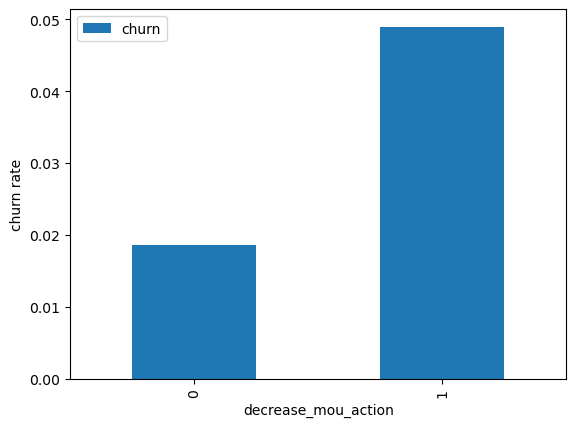

In [75]:
data1.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


#### *Analysis*

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

Churn rate on the basis whether the customer decreased her/his number of recharge in action month


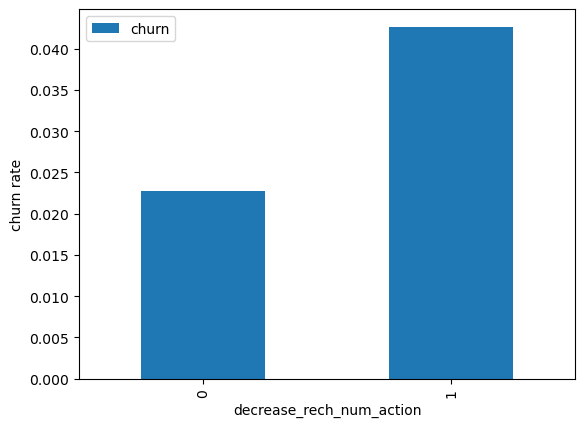

In [76]:
data1.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


#### *Analysis*

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

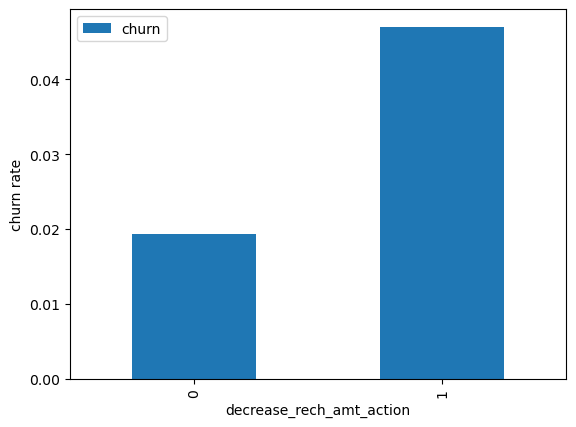

In [77]:
data1.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


#### *Analysis*

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

Churn rate on the basis whether the customer decreased her/his volume based cost in action month

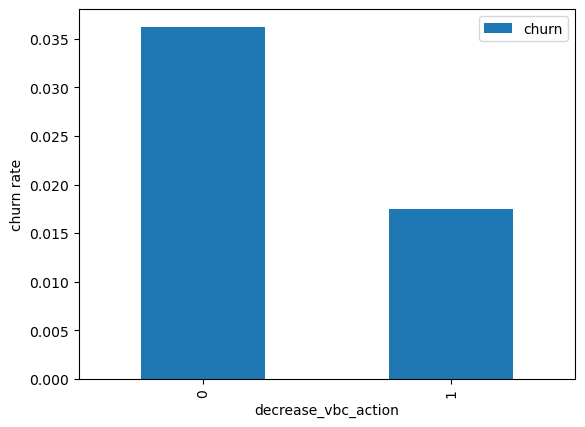

In [78]:
data1.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


#### *Analysis*

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

Analysis of the average revenue per customer (churn and not churn) in the action phase


In [79]:
# Creating churn dataframe
data1_churn = data1[data1['churn'] == 1]

# Creating not churn dataframe
data1_non_churn = data1[data1['churn'] == 0]


[Text(0.5, 0, 'Action phase ARPU')]

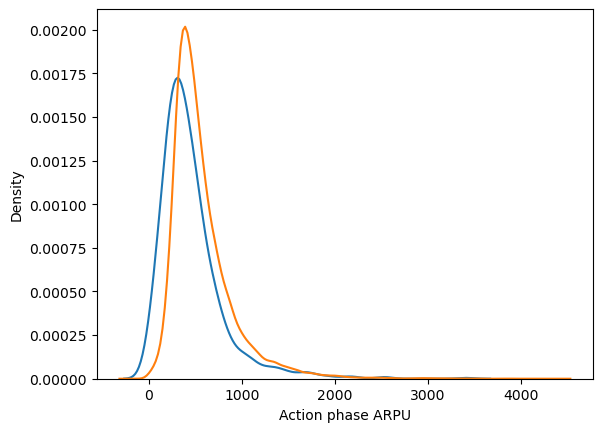

In [80]:
# Distribution plot
ax = sns.distplot(data1_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data1_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')


Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

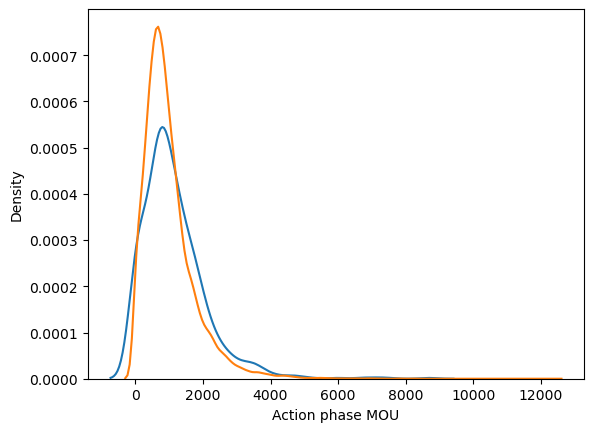

In [81]:
# Distribution plot
ax = sns.distplot(data1_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data1_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')


Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

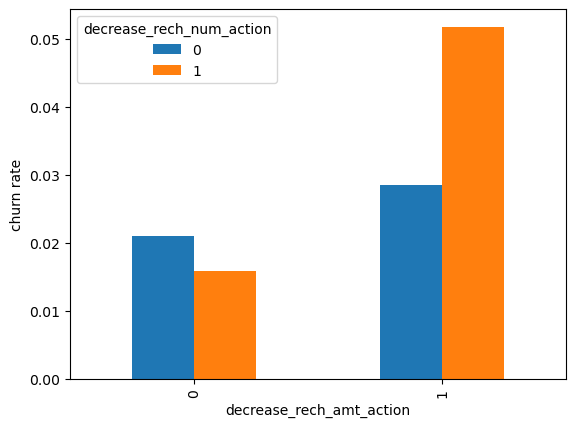

In [82]:
data1.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


#### *Analysis*

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

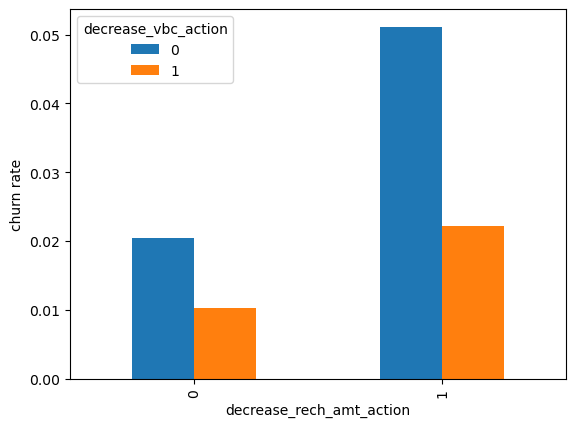

In [83]:
data1.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


#### *Analysis*

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

Analysis of recharge amount and number of recharge in action month

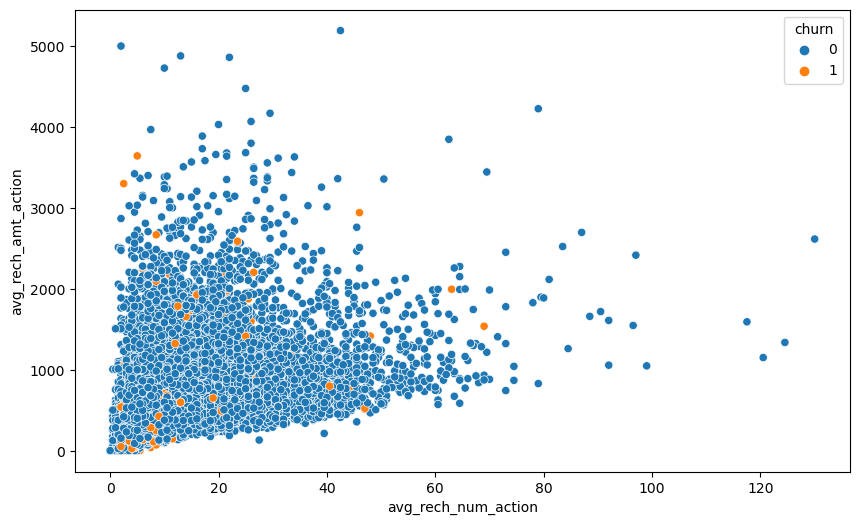

In [84]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data = data1)


#### *Analysis*

We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

Dropping few derived columns, which are not required in further analysis


In [85]:
data1 = data1.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)


In [86]:
# Import library
from sklearn.model_selection import train_test_split

In [87]:
# Putting feature variables into X
X = data1.drop(['mobile_number','churn'], axis=1)

In [88]:
# Putting target variable to y
y = data1['churn']

In [89]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


#### Dealing with data imbalance
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).


In [90]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [91]:
# Instantiate SMOTE
oversample= SMOTE(random_state=27)


In [92]:
# Fitting SMOTE to the train set
X_train, y_train = oversample.fit_resample(X_train, y_train)


#### Feature Scaling

In [93]:
# Standardization method
from sklearn.preprocessing import StandardScaler


In [94]:
# Instantiate the Scaler
scaler = StandardScaler()


In [95]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')


In [96]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])


In [97]:
X_train.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,-0.585598,-0.232558,0.237489,-0.429928,-0.351537,0.148594,-0.319283,-0.289300,0.111644,-0.269301,-0.253853,-0.312738,-0.291991,-0.338970,-0.344186,0.478565,0.554504,1.295042,0.651427,0.690005,0.997309,-0.277874,-0.113001,-0.242843,-0.201458,-0.262302,-0.229106,0.696176,0.784386,1.406366,-0.579807,-0.530568,-0.372170,-0.515748,-0.503863,-0.279631,-0.137832,-0.133386,-0.116826,0.0,0.0,0.0,-0.782329,-0.731448,-0.442323,-0.065649,0.498602,-0.059782,-0.381856,-0.368575,-0.278460,-0.326159,-0.015792,-0.020922,-0.479701,-0.390538,0.266582,0.877463,1.066379,1.990570,0.977814,1.249017,1.499028,-0.271495,-0.197199,-0.216790,1.083847,1.374137,1.973689,0.178947,0.076732,0.891462,1.292808,1.834953,1.644494,-0.084085,-0.136111,-0.105201,0.0,0.0,0.0,0.969533,1.237335,1.655099,1.304017,1.656156,2.464111,-0.373086,-0.099173,-0.197503,-0.140695,-0.074986,1.160185,-0.078604,-0.089702,-0.073253,-0.185002,0.002282,1.161578,-0.490110,-0.297682,0.233760,0.324233,0.296067,0.451271,-0.373250,-0.332465,-0.553532,-0.249847,-0.245363,-0.215855,-0.259000,-0.252912,-0.239910,-0.248154,-0.246135,-0.232917,-0.257914,-0.269830,-0.261147,-0.221698,-0.217234,-0.214567,-0.138429,-0.134555,-0.116559,1.696813,-0.258964,-0.265251,-0.259309,0,0,0,0,0
1,0.0,0.0,0.0,-0.540792,1.153098,0.278540,-0.710213,-0.667457,-0.523865,0.462360,2.117714,0.721711,-0.034634,-0.240673,-0.312738,0.145940,-0.168470,-0.344186,-0.314948,-0.304182,-0.255982,-0.211096,0.077279,0.010297,-0.047448,-0.265373,-0.242843,-0.201458,-0.262302,-0.224273,-0.328927,-0.154732,-0.160084,-0.590306,-0.544489,-0.405031,0.501345,2.225737,0.954738,-0.137832,-0.133386,-0.111234,0.0,0.0,0.0,-0.075073,1.170116,0.340023,-0.085872,-0.082358,-0.062139,-0.381856,-0.368575,-0.262078,-0.326159,-0.015792,-0.020922,-0.220460,1.056324,0.214298,-0.412124,-0.294920,-0.164910,-0.393246,0.101182,0.407703,-0.154433,-0.189964,-0.194928,-0.502097,-0.104170,0.180200,-0.229145,-0.209599,-0.170969,-0.251902,0.146299

#### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.



In [98]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
53193,0.0,0.0,0.0,-0.534144,-0.241035,-0.023969,-0.501149,-0.294777,-0.288365,-0.495104,-0.511868,-0.118178,-0.269301,-0.253853,-0.312738,-0.291991,-0.33897,-0.344186,0.205619,0.322088,0.182160,0.279627,0.087334,0.603389,0.358718,1.443792,1.383938,-0.107200,-0.262302,-0.208164,0.324231,0.338446,0.570533,-0.556004,-0.385603,-0.344547,-0.574231,-0.544542,-0.416770,-0.137832,-0.095907,-0.116826,0.0,0.0,0.0,-0.806268,-0.656486,-0.512608,-0.085872,-0.082358,-0.062139,-0.117656,-0.056369,0.161030,2.241032,-0.015792,-0.020922,-0.646081,-0.499634,-0.177403,1.820728,1.419674,1.598717,3.628550,1.542471,1.317733,6.013020,5.084903,3.610802,4.313798,2.541969,2.163094,-0.028996,0.352873,1.664107,-0.287167,-0.312565,-0.161235,1.747339,-0.028907,-0.062492,0.0,0.0,0.0,0.001482,0.012186,0.735194,3.637863,2.163216,2.073985,-0.027101,-0.099173,-0.197503,-0.160699,0.059988,-0.128421,-0.047695,0.491321,0.063258,0.886307,0.804063,1.037517,-0.572315,-0.262566,-0.020800,-0.813811,-0.286927,-0.540699,-0.677132,-0.498705,-0.324652,-0.249847,-0.245363,-0.215855,-0.259,-0.252912,-0.23991,-0.248154,-0.246135,-0.232917,-0.257914,-0.26983,-0.261147,-0.221698,-0.217234,-0.214567,-0.138429,-0.134555,-0.116559,1.475555,-0.258964,-0.265251,-0.259309,1,1,0,0,0
8662,0.0,0.0,0.0,-0.319700,-0.362459,-0.115756,-0.389922,0.316997,-0.030436,0.724590,0.030863,0.820969,-0.269301,-0.253853,-0.312738,-0.291991,-0.33897,-0.344186,-0.364624,-0.280647,-0.279242,-0.495790,-0.605218,-0.472774,-0.277874,-0.228166,-0.242843,2.646398,2.214209,1.378621,-0.555917,-0.578216,-0.484491,-0.236304,0.476008,0.160387,0.963570,0.312701,1.299173,-0.137832,-0.133386,-0.116826,0.0,0.0,0.0,0.505043,0.554893,0.956638,-0.085872,-0.082358,-0.062139,2.141805,0.591625,1.215128,0.363395,-0.015792,-0.020922,0.300815,0.315849,0.643681,-0.411458,-0.285363,-0.328066,-0.048244,-0.605015,-0.506221,-0.284726,-0.265262,-0.255123,-0.275540,-0.604459,-0.544688,0.110249,0.697578,0.060355,-0.294732,-0.323358,-0.2

#### Model with PCA

In [99]:
#Import PCA
from sklearn.decomposition import PCA


In [100]:
# Instantiate PCA
pca = PCA(random_state=42)


In [101]:
# Fit train set on PCA
pca.fit(X_train)


PCA(random_state=42)

In [102]:
# Principal components
pca.components_


array([[ 4.89017711e-19,  1.11022302e-16, -2.22044605e-16, ...,
        -2.38477969e-02, -2.42312183e-02,  1.38425766e-02],
       [-2.43210371e-19,  1.38777878e-16,  2.77555756e-17, ...,
        -6.69082315e-03, -7.48768406e-03, -1.28497276e-02],
       [-5.25751787e-19,  5.55111512e-17, -1.24900090e-16, ...,
        -2.59589899e-02, -3.11746070e-02,  1.91899134e-02],
       ...,
       [ 0.00000000e+00,  2.13143932e-01, -4.76786976e-01, ...,
        -6.93889390e-18,  6.24500451e-17, -1.18828558e-16],
       [ 0.00000000e+00, -1.18043654e-01,  6.89236213e-01, ...,
        -6.24500451e-17, -5.55111512e-17,  1.97758476e-16],
       [ 9.99998232e-01, -1.79005487e-03, -4.06544133e-04, ...,
         2.00577402e-18, -8.13151629e-20,  1.82281490e-18]])

In [103]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)


[0.11143684 0.19443505 0.25021969 0.29486558 0.33732942 0.37490516
 0.40991719 0.43934228 0.4654987  0.49080289 0.51392559 0.53594604
 0.55690104 0.57699238 0.59615025 0.61471399 0.6315524  0.64724263
 0.66185678 0.67581453 0.68946996 0.70241337 0.71455976 0.72638276
 0.73727566 0.74747673 0.75698524 0.76639559 0.77560883 0.78453652
 0.79259403 0.80023471 0.80771555 0.81495259 0.82189982 0.8285725
 0.83498211 0.84123309 0.84726685 0.85285475 0.85823716 0.86354397
 0.86870196 0.87369373 0.8784377  0.88281094 0.8868099  0.89077441
 0.89472728 0.89857715 0.9023167  0.90597094 0.9095968  0.91318686
 0.91665442 0.9199147  0.92311203 0.92608352 0.92891241 0.9316823
 0.93439749 0.93705473 0.93965181 0.94220177 0.944711   0.94718969
 0.94961812 0.95199134 0.95429821 0.95654968 0.95869502 0.96081853
 0.96289054 0.96487919 0.96680256 0.96870211 0.97056807 0.97238758
 0.97413877 0.97582655 0.97749199 0.97912068 0.98070819 0.98227054
 0.98378629 0.98527129 0.98670451 0.98807842 0.98936916 0.990542

Text(0, 0.5, 'Cumulative Variance')

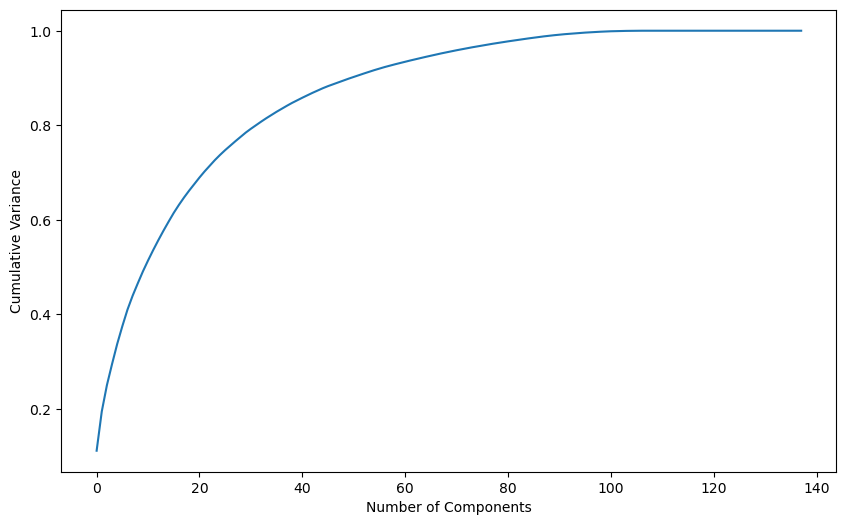

In [104]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

#### Performing PCA with 60 components

In [105]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [106]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)


In [107]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)


#### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.


In [108]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.
Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.




#### Logistic regression with PCA

In [109]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression


In [110]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.



In [111]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [112]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [113]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.268994,0.016655,0.010584,0.006853,0.01,{'C': 0.01},0.892521,0.903181,0.898611,0.904125,0.90907,0.901502,0.005586,6,0.904622,0.900151,0.902974,0.901245,0.899530,0.901704,0.001869
1,0.394093,0.034709,0.009921,0.004734,0.1,{'C': 0.1},0.891580,0.902490,0.899769,0.906430,0.90907,0.901868,0.006055,4,0.905371,0.900556,0.903726,0.901882,0.899878,0.902283,0.002027
2,0.486227,0.027292,0.004850,0.005780,1,{'C': 1},0.891110,0.902720,0.899537,0.906200,0.90930,0.901773,0.006258,5,0.905083,0.900614,0.904073,0.901767,0.900400,0.902387,0.001876
3,0.485858,0.032091,0.001603,0.003205,10,{'C': 10},0.891345,0.903181,0.899306,0.906430,0.90930,0.901912,0.006246,3,0.904910,0.900730,0.904073,0.901593,0.900226,0.902306,0.001856
4,0.505276,0.023415,0.006331,0.007755,100,{'C': 100},0.891345,0.903412,0.899306,0.906430,0.90930,0.901958,0.006256,1,0.904910,0.900788,0.904073,0.901593,0.900226,0.902318,0.001846
5,0.501174,0.026458,0.012366,0.006189,1000,{'C': 1000},0.891345,0.903412,0.899306,0.906430,0.90930,0.901958,0.006256,1,0.904910,0.900788,0.904073,0.901593,0.900226,0.902318,0.001846


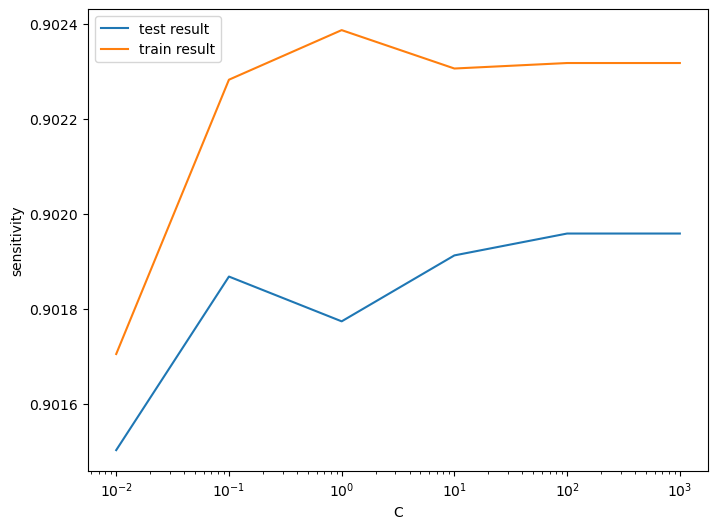

In [114]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [115]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9019584447783151 at C = 100


#### Logistic regression with optimal C

In [116]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [117]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Prediction on the train set

In [118]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18019  3585]
 [ 2108 19496]]


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8682419922236623
Sensitivity:- 0.9024254767635623
Specificity:- 0.8340585076837622


#### Prediction on the test set

In [122]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [123]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4511  898]
 [  35  149]]


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8331843375648131
Sensitivity:- 0.8097826086956522
Specificity:- 0.8339804030319837


#### *Model summary*

 * Train set
   - Accuracy = 0.86
   - Sensitivity = 0.89
   - Specificity = 0.83
 * Test set
   - Accuracy = 0.83
   - Sensitivity = 0.81
   - Specificity = 0.83
 
Overall, the model is performing well in the test set, what it had learnt from the train set.


## Random forest with PCA

In [130]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [132]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


We can get accuracy of 0.8382707263281893 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


#### Model with optimal hyperparameters

In [133]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [134]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Prediction on the train set

In [135]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [136]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17746  3858]
 [ 2982 18622]]


In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8416959822255138
Sensitivity:- 0.861970005554527
Specificity:- 0.8214219588965006


#### Prediction on the test set

In [139]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [140]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4443  966]
 [  52  132]]


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8179867691757554
Sensitivity:- 0.717391304347826
Specificity:- 0.8214087631724903


#### *Model summary*

 * Train set
  - Accuracy = 0.84
  - Sensitivity = 0.88
  - Specificity = 0.80
 * Test set
  - Accuracy = 0.80
  - Sensitivity = 0.75
  - Specificity = 0.80

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

#### Final conclusion with PCA

After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

## Without PCA

#### Logistic regression with No PCA 

In [143]:
#Importing stats model
import statsmodels.api as sm

In [144]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())


In [145]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()


In [146]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43208
Model:                            GLM   Df Residuals:                    43078
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Nov 2023   Deviance:                       24660.
Time:                        21:56:48   Pearson chi2:                 5.46e+09
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -86.3769   6753.164     -0.013      0.990   -1.33e+04    1.31e+04
loc_og_t2o_mou           -1.083e-06   7.96e-05     -0.014      0.989      -0.000       0.000
std_og_t2o_mou            1.782e-06      0.000      0.016      0.987      -0.000       0.000
loc_ic_t2o_mou             1.09e-07   1.21e-05      0.009      0.993   -2.36e-05    2.38e-05
arpu_6                      -0.2517      0.090     -2.782      0.005      -0.429      -0.074
arpu_7                       0.2260      0.098      2.306      0.021       0.034       0.418
arpu_8                       0.1814      0.108      1.686      0.092      -0.030       0.392
onnet_mou_6                 11.0497      3.300      3.348      0.001       4.582      17.518
onnet_mou_7                 -3.7882      2.055     -1.844      0.065      -7.815       0.239
onnet_mou_8                 -0.2181      1.988     -0.110      0.913      -4.115       3.679
offnet_mou_6                10.8494      3.249      3.339      0.001       4.481      17.218
offnet_mou_7                -1.4617      2.015     -0.725      0.468      -5.411       2.487
offnet_mou_8                -2.9574      1.921     -1.540      0.124      -6.722       0.807
roam_ic_mou_6                0.2443      0.038      6.475      0.000       0.170       0.318
roam_ic_mou_7                0.0861      0.057      1.516      0.129      -0.025       0.197
roam_ic_mou_8                0.2582      0.049      5.279      0.000       0.162       0.354
roam_og_mou_6               -3.6019      1.013     -3.556      0.000      -5.587      -1.617
roam_og_mou_7                0.5355      0.590      0.907      0.364      -0.621       1.692
roam_og_mou_8                1.3730      0.782      1.755      0.079      -0.161       2.907
loc_og_t2t_mou_6         -3945.6508    639.043     -6.174      0.000   -5198.153   -2693.149
loc_og_t2t_mou_7            61.6744    634.189      0.097      0.923   -1181.313    1304.662
loc_og_t2t_mou_8          6482.7477    634.112     10.223      0.000    5239.911    7725.585
loc_og_t2m_mou_6         -4265.7081    690.846     -6.175      0.000   -5619.742   -2911.674
loc_og_t2m_mou_7            62.7555    656.332      0.096      0.924   -1223.632    1349.143
loc_og_t2m_mou_8          6932.0371    677.984     10.224      0.000    5603.213    8260.862
loc_og_t2f_mou_6          -346.5615     56.158     -6.171      0.000    -456.630    -236.493
loc_og_t2f_mou_7             5.6785     57.312      0.099      0.921    -106.651     118.008
loc_og_t2f_mou_8           570.9699     55.880     10.218      0.000     461.448     680.492
loc_og_t2c_mou_6             0.0595      0.023      2.613      0.009       0.015       0.104
loc_og_t2c_mou_7             0.0013      0.027      0.047      0.962      -0.052       0.054
loc_og_t2c_mou

#### Model analysis

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.

#### Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [154]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

### RFE with 15 columns

In [155]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
#rfe = RFE(logreg, 15)


# Fit the rfe model with train set
#rfe = rfe.fit(X_train, y_train)


logreg.fit(X_train, y_train)

rfe =  RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)


In [156]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'total_ic_mou_8', 'ic_others_8', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_3g_8', 'decrease_rech_num_action', 'decrease_vbc_action'],
      dtype='object')


#### Model-1 with RFE selected columns

In [157]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43208
Model:                            GLM   Df Residuals:                    43192
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 07 Nov 2023   Deviance:                       30933.
Time:                        22:10:08   Pearson chi2:                 3.49e+12
No. Iterations:                    35   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -28.6121   5915.302     -0.005      0.996   -1.16e+04    1.16e+04
onnet_mou_8                  8.3621      1.202      6.955      0.000       6.006      10.719
offnet_mou_8                 5.9083      1.181      5.003      0.000       3.594       8.223
roam_og_mou_8               -1.7269      0.478     -3.613      0.000      -2.664      -0.790
std_og_t2t_mou_7             0.6901      0.028     24.744      0.000       0.635       0.745
std_og_t2m_mou_8             2.5025      0.083     30.027      0.000       2.339       2.666
og_others_8              -1332.1924   2.83e+05     -0.005      0.996   -5.55e+05    5.53e+05
total_og_mou_8             -13.4084      1.757     -7.632      0.000     -16.852      -9.965
loc_ic_t2f_mou_8            -1.2655      0.082    -15.523      0.000      -1.425      -1.106
total_ic_mou_8              -1.4598      0.051    -28.462      0.000      -1.560      -1.359
ic_others_8                 -1.2579      0.138     -9.131      0.000      -1.528      -0.988
monthly_2g_7                -0.7658      0.044    -17.448      0.000      -0.852      -0.680
monthly_2g_8                -0.7873      0.055    -14.269      0.000      -0.895      -0.679
monthly_3g_8                -1.0342      0.047    -22.218      0.000      -1.125      -0.943
decrease_rech_num_action    -0.4734      0.031    -15.434      0.000      -0.533      -0.413
decrease_vbc_action         -1.1445      0.072    -15.911      0.000      -1.285      -1.003
============================================================================================
"""

#### Checking VIFs

In [158]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,4147.40
0,onnet_mou_8,1947.07
1,offnet_mou_8,1857.14
2,roam_og_mou_8,306.52
4,std_og_t2m_mou_8,5.31
3,std_og_t2t_mou_7,1.77
8,total_ic_mou_8,1.59
10,monthly_2g_7,1.52
11,monthly_2g_8,1.52
7,loc_ic_t2f_mou_8,1.18


#### Removing column og_others_8, which is insignificatnt as i

In [160]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_8', 'decrease_rech_num_action', 'decrease_vbc_action']


#### Model-2

Building the model after removing og_others_8 variable.

In [161]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43208
Model:                            GLM   Df Residuals:                    43193
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15505.
Date:                Tue, 07 Nov 2023   Deviance:                       31011.
Time:                        22:10:10   Pearson chi2:                 3.36e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4876
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7491      0.032    -23.311      0.000      -0.812      -0.686
onnet_mou_8                  8.6866      1.198      7.253      0.000       6.339      11.034
offnet_mou_8                 6.2253      1.176      5.292      0.000       3.920       8.531
roam_og_mou_8               -1.8575      0.476     -3.901      0.000      -2.791      -0.924
std_og_t2t_mou_7             0.6893      0.028     24.752      0.000       0.635       0.744
std_og_t2m_mou_8             2.5019      0.083     30.047      0.000       2.339       2.665
total_og_mou_8             -13.8810      1.750     -7.933      0.000     -17.311     -10.451
loc_ic_t2f_mou_8            -1.2664      0.082    -15.534      0.000      -1.426      -1.107
total_ic_mou_8              -1.4621      0.051    -28.506      0.000      -1.563      -1.362
ic_others_8                 -1.2640      0.138     -9.167      0.000      -1.534      -0.994
monthly_2g_7                -0.7638      0.044    -17.405      0.000      -0.850      -0.678
monthly_2g_8                -0.7975      0.056    -14.261      0.000      -0.907      -0.688
monthly_3g_8                -1.0324      0.047    -22.196      0.000      -1.124      -0.941
decrease_rech_num_action    -0.4703      0.031    -15.362      0.000      -0.530      -0.410
decrease_vbc_action         -1.1471      0.072    -15.972      0.000      -1.288      -1.006
============================================================================================
"""

#### Checking VIF for Model-2

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_8,4123.02
0,onnet_mou_8,1935.73
1,offnet_mou_8,1846.29
2,roam_og_mou_8,304.75
4,std_og_t2m_mou_8,5.31
3,std_og_t2t_mou_7,1.77
7,total_ic_mou_8,1.59
9,monthly_2g_7,1.52
10,monthly_2g_8,1.52
6,loc_ic_t2f_mou_8,1.18


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

#### Model-3

Model after removing offnet_mou_8 column.

In [163]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43208
Model:                            GLM   Df Residuals:                    43193
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15505.
Date:                Tue, 07 Nov 2023   Deviance:                       31011.
Time:                        22:10:41   Pearson chi2:                 3.36e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4876
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7491      0.032    -23.311      0.000      -0.812      -0.686
onnet_mou_8                  8.6866      1.198      7.253      0.000       6.339      11.034
offnet_mou_8                 6.2253      1.176      5.292      0.000       3.920       8.531
roam_og_mou_8               -1.8575      0.476     -3.901      0.000      -2.791      -0.924
std_og_t2t_mou_7             0.6893      0.028     24.752      0.000       0.635       0.744
std_og_t2m_mou_8             2.5019      0.083     30.047      0.000       2.339       2.665
total_og_mou_8             -13.8810      1.750     -7.933      0.000     -17.311     -10.451
loc_ic_t2f_mou_8            -1.2664      0.082    -15.534      0.000      -1.426      -1.107
total_ic_mou_8              -1.4621      0.051    -28.506      0.000      -1.563      -1.362
ic_others_8                 -1.2640      0.138     -9.167      0.000      -1.534      -0.994
monthly_2g_7                -0.7638      0.044    -17.405      0.000      -0.850      -0.678
monthly_2g_8                -0.7975      0.056    -14.261      0.000      -0.907      -0.688
monthly_3g_8                -1.0324      0.047    -22.196      0.000      -1.124      -0.941
decrease_rech_num_action    -0.4703      0.031    -15.362      0.000      -0.530      -0.410
decrease_vbc_action         -1.1471      0.072    -15.972      0.000      -1.288      -1.006
============================================================================================
"""

#### VIF Model-3

In [164]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,total_og_mou_8,4123.02
0,onnet_mou_8,1935.73
1,offnet_mou_8,1846.29
2,roam_og_mou_8,304.75
4,std_og_t2m_mou_8,5.31
3,std_og_t2t_mou_7,1.77
7,total_ic_mou_8,1.59
9,monthly_2g_7,1.52
10,monthly_2g_8,1.52
6,loc_ic_t2f_mou_8,1.18


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that **Model-3 log_no_pca_3 will be the final model**.

#### Model performance on the train set

In [165]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.003950
1    0.421553
2    0.077591
3    0.000119
4    0.000008
dtype: float64

#### Creating a dataframe with the actual churn and the predicted probabilities

In [166]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.003950,0
1,0,0.421553,1
2,0,0.077591,2
3,0,0.000119,3
4,0,0.000008,4


#### Finding Optimal Probablity Cutoff Point

In [167]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003950,0,1,0,0,0,0,0,0,0,0,0
1,0,0.421553,1,1,1,1,1,1,0,0,0,0,0
2,0,0.077591,2,1,0,0,0,0,0,0,0,0,0
3,0,0.000119,3,1,0,0,0,0,0,0,0,0,0
4,0,0.000008,4,1,0,0,0,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [168]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.759489     0.983660     0.535318
0.2          0.2  0.795941     0.969913     0.621968
0.3          0.3  0.819894     0.952925     0.686864
0.4          0.4  0.837692     0.931864     0.743520
0.5          0.5  0.849310     0.900296     0.798324
0.6          0.6  0.853777     0.855443     0.852111
0.7          0.7  0.847274     0.785549     0.908998
0.8          0.8  0.772218     0.588317     0.956119
0.9          0.9  0.623056     0.264164     0.981948


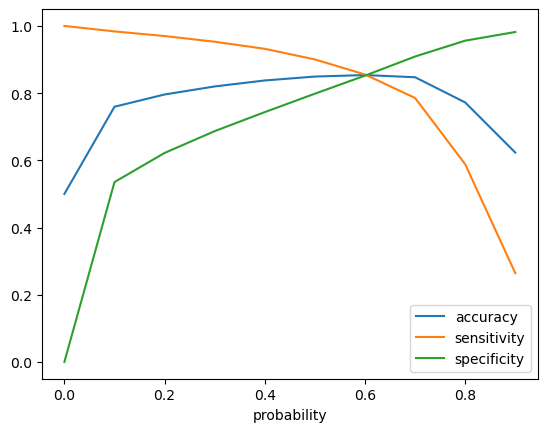

In [169]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

#### Analysis of the above curve

**Accuracy** - Becomes stable around 0.6

**Sensitivity** - Decreases with the increased probablity.

**Specificity** - Increases with the increasing probablity.

At point **0.6** where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take **0.6** as the optimum probability cutoff, we are taking **0.5** for acheiving higher sensitivity, which is our main goal.

In [170]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.003950,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.421553,1,1,1,1,1,1,0,0,0,0,0,0
2,0,0.077591,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000119,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000008,4,1,0,0,0,0,0,0,0,0,0,0


## Metrics

In [171]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[17247  4357]
 [ 2154 19450]]


In [172]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8493103129050176
Sensitivity:- 0.900296241436771
Specificity:- 0.7983243843732643


We have got good accuracy, sensitivity and specificity on the train set prediction.

#### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [174]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

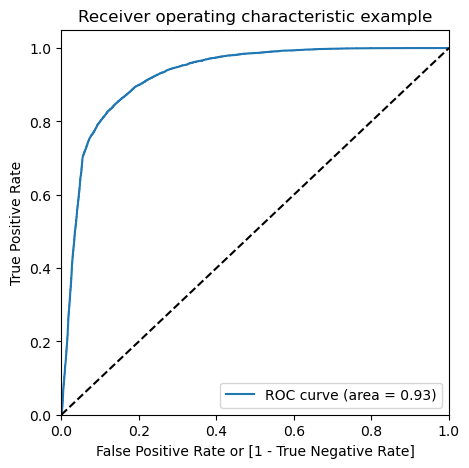

In [175]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])


We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

#### Testing the model on the test set

In [176]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [177]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [178]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

#### Predictions on the test set with final model

In [179]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [180]:
y_test_pred.head()

53193    0.000058
8662     0.767643
73126    0.000632
23075    0.555309
36335    0.000044
dtype: float64

In [181]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
53193,0.000058
8662,0.767643
73126,0.000632
23075,0.555309
36335,0.000044


In [182]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
53193,0
8662,0
73126,0
23075,0
36335,0


In [183]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [184]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [186]:
y_test_pred_final.head()

,churn,CustID,0
0,0,53193,0.000058
1,0,8662,0.767643
2,0,73126,0.000632
3,0,23075,0.555309
4,0,36335,0.000044


In [188]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})


In [189]:
y_test_pred_final.head()


,churn,CustID,churn_prob
0,0,53193,0.000058
1,0,8662,0.767643
2,0,73126,0.000632
3,0,23075,0.555309
4,0,36335,0.000044


In [190]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)


In [191]:
y_test_pred_final.head()


,churn,CustID,churn_prob,test_predicted
0,0,53193,0.000058,0
1,0,8662,0.767643,1
2,0,73126,0.000632,0
3,0,23075,0.555309,1
4,0,36335,0.000044,0


#### Metrics

In [192]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)


[[4330 1079]
 [  31  153]]


In [193]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [194]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8015376363311282
Sensitivity:- 0.8315217391304348
Specificity:- 0.8005176557589203


#### Model summary

Train set

 - Accuracy = 0.84
 - Sensitivity = 0.81
 - Specificity = 0.83

Test set

 - Accuracy = 0.78
 - Sensitivity = 0.82
 - Specificity = 0.78

Overall, the model is performing well in the test set, what it had learnt from the train set.

## Conclusion 

 - Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.

 - Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.

 - Cutomer’s with tenure less than 4 years are more likely to churn.

 - Max Recharge Amount is a strong feature to predict churn.

 - Random Forest produced the best prediction results followed by SVM.


#### Recomendations

 - Target the customer’s, whose monthly 3G recharge in August is more, as they are likely to be churned.

 - Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase   (mostly in the month of August).

 - Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are      more likely to churn.

 - Customer’s decreasing monthly 2g usage for August are most probable to churn target them.

 - Target the customers, whose outgoing others charge in July and incoming others on August are less.


#### Plots of important predictors for churn and non churn customers

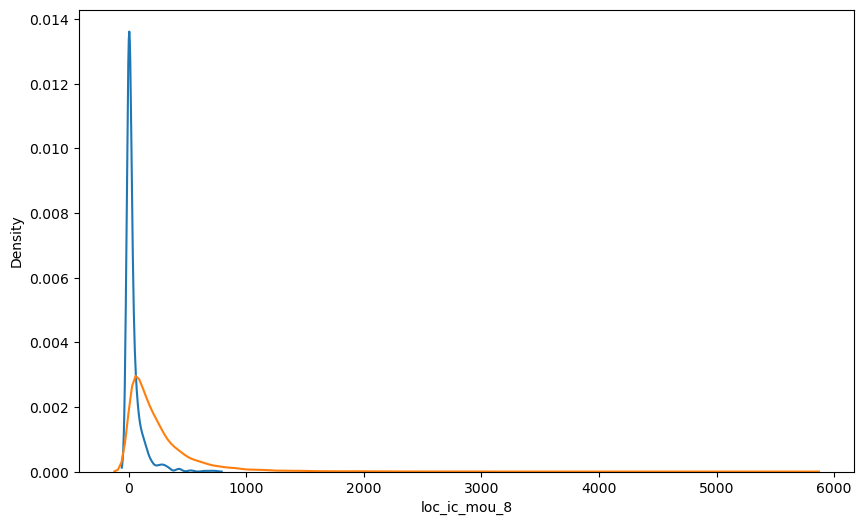

In [198]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data1_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data1_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

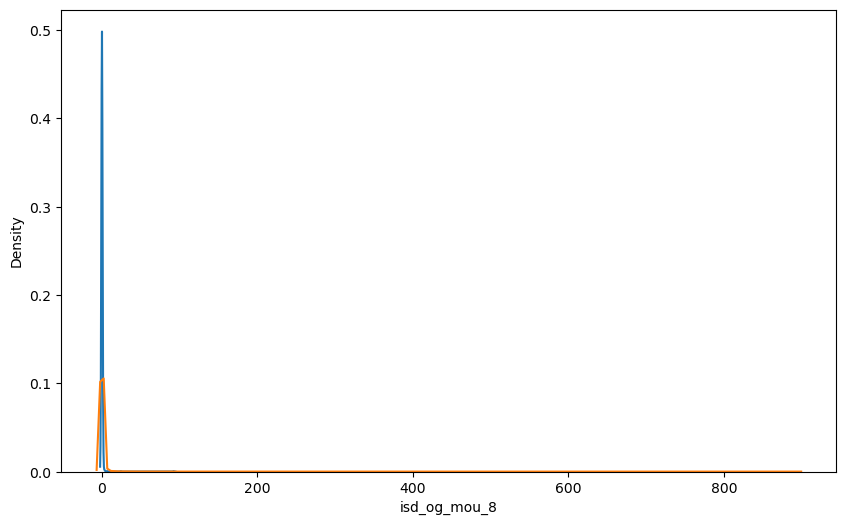

In [199]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data1_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data1_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

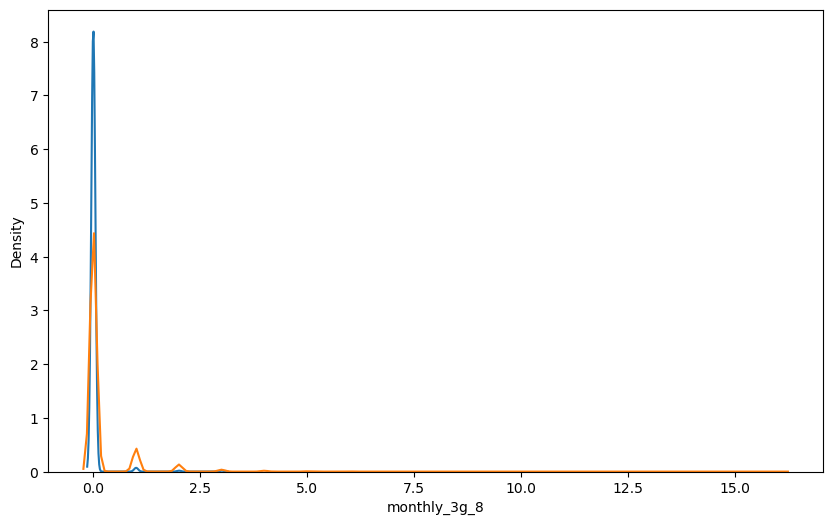

In [200]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data1_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data1_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.